In [177]:
import matplotlib.pyplot as plt
from google.cloud import bigquery
import pandas as pd

In [178]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=<JSON_KEY_PATH>

In [179]:
client = bigquery.Client()

In [180]:
%reload_ext google.cloud.bigquery

In [181]:
%%bigquery open_and_close
SELECT
    CONCAT(EXTRACT(DAY from DATETIME(date)), '/', EXTRACT(MONTH from DATETIME(date)), ':', hour) as Date_Time,
    open as open_GOOG, 
    close as close_GOOG
FROM `egen-training-mbs.stock_data.GOOG`

Downloading: 100%|██████████| 13/13 [00:02<00:00,  5.83rows/s]


In [81]:
open_and_close

,Date_Time,open_GOOG,close_GOOG
0,12/7:16,2612.572000,2614.508000
1,12/7:17,2609.590000,2609.590000
2,12/7:19,2613.980000,2613.980000
3,13/7:08,2612.000000,2611.753333
4,13/7:09,2616.478571,2616.944286
5,13/7:10,2626.545958,2626.783242
6,13/7:11,2634.861808,2635.757308
7,13/7:12,2634.014158,2633.916250
8,13/7:13,2625.548333,2624.625492
9,13/7:14,2622.403742,2622.760108


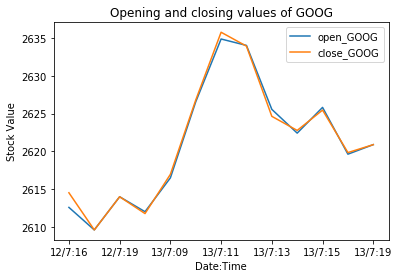

In [182]:
open_and_close.plot(
    x="Date_Time", 
    xlabel="Date:Time", 
    ylabel="Stock Value", 
    title="Opening and closing values of GOOG"
)

In [183]:
%%bigquery highest_point
SELECT
    CONCAT(EXTRACT(DAY from DATETIME(date)), '/', EXTRACT(MONTH from DATETIME(date)), ':', hour) as Date_Time,
    high as high_GOOG
FROM `egen-training-mbs.stock_data.GOOG`
ORDER BY
    high DESC

Downloading: 100%|██████████| 13/13 [00:01<00:00, 10.54rows/s]


In [87]:
highest_point

,Date_Time,high_GOOG
0,13/7:11,2636.448425
1,13/7:12,2634.983942
2,13/7:10,2628.402492
3,13/7:15,2626.904583
4,13/7:13,2626.688408
5,13/7:14,2623.874058
6,13/7:19,2620.880000
7,13/7:16,2620.366000
8,13/7:09,2618.063571
9,12/7:16,2614.814000


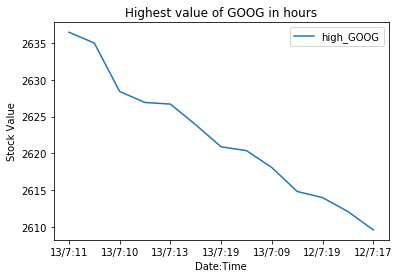

In [90]:
highest_point.plot(
    x="Date_Time", 
    xlabel="Date:Time", 
    ylabel="Stock Value", 
    title="Highest value of GOOG in hours")

In [138]:
%%bigquery vol_goog
SELECT date, SUM(volume) as volume_GOOG
from `egen-training-mbs.stock_data.GOOG`
GROUP BY
    date

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.48rows/s]


In [139]:
vol_goog

,date,volume_GOOG
0,2021-07-12,29233.40000
1,2021-07-13,77800.02381


In [144]:
%%bigquery vol_tsla
SELECT date, SUM(volume) as volume_TSLA
from `egen-training-mbs.stock_data.TSLA`
GROUP BY
    date

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.24s/rows]


In [145]:
vol_tsla

,date,volume_TSLA
0,2021-07-13,795550.05


In [152]:
vol = pd.DataFrame()
vol = vol_goog.append(vol_tsla)

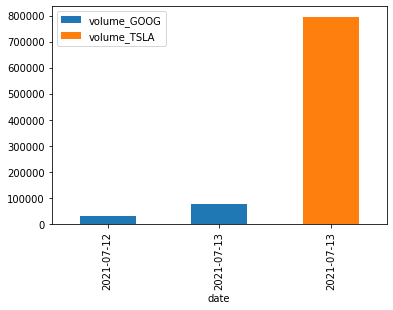

In [162]:
vol.plot(kind="bar", stacked=True, x="date")

In [167]:
%%bigquery high_goog
SELECT date, high
from `egen-training-mbs.stock_data.GOOG`

Downloading: 100%|██████████| 13/13 [00:01<00:00,  9.52rows/s]


In [168]:
high_goog

,date,high
0,2021-07-12,2614.814000
1,2021-07-12,2609.590000
2,2021-07-12,2613.980000
3,2021-07-13,2612.086667
4,2021-07-13,2618.063571
5,2021-07-13,2628.402492
6,2021-07-13,2636.448425
7,2021-07-13,2634.983942
8,2021-07-13,2626.688408
9,2021-07-13,2623.874058


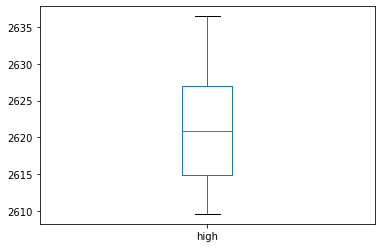

In [174]:
high_goog.plot(kind="box", x="date", y="high")

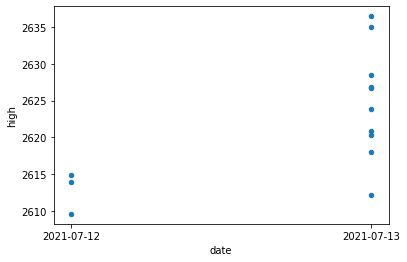

In [175]:
high_goog.plot(kind="scatter", x="date", y="high")